Importing Libraries

In [1]:
import nltk
import re
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize, word_tokenize, pos_tag
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from io import StringIO
import csv
import unicodedata
import string
import plotly
import plotly.express as px
import plot_likert
from sklearn.model_selection import train_test_split

In [2]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv(r"D:\DataAnalysis\Social_Survey_Questionnaire_for_Beneficiaries_0.csv")
type(df)
df

,ObjectID,GlobalID,Logo_TUDresden,Logo_IOER,Name of Researcher: Nathan Namatama,Email: n.namatama@ioer.de,Logo,The social survey questionnaire is meant to gather information on three things:,•\t How social and ecological systems are managed: This includes understanding how communities and natural environments are governed.,"•\t How people's livelihood activities change the landscape: This looks at how different livelihoods impact the land, environment as well as the land use land cover change.",...,Specify:.2,Specify:.3,Specify:.4,Specify:.5,Specify:.6,Specify:.7,Specify:.8,Specify:.9,x,y
0,1,b8330d48-b014-43e9-83ee-65e2eef11c4f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1,2,bb5a8756-5fa8-425b-b48e-590943d89688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2,3,4330fe39-a7c1-4c52-adf5-80b1ea153095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.628698,-11.663522
3,4,a65873e1-686d-4f03-973d-a4620eb9798b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.441380,-11.549158
4,5,d9d192e3-225a-4e27-b439-a5b881a0e26e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,All the cannot change except for hunting,Only the protection nature the others are not ...,NaN,NaN,NaN,When the people come them they give us imforma...,NaN,29.441459,-11.549211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,0b3b2aad-707c-46c2-ac09-4d38e14e1d3d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.202439,-15.374461
146,147,de6da6cc-c6e1-4114-adf0-14a03a50354d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Tgrought word of mouth,Fromm pin,23.201394,-15.377789
147,148,1dd0393e-d55a-4c1c-8052-8c678c177fd3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Through phones and through word mouth,NaN,23.176112,-15.387063
148,149,49eec3a2-09ae-42f2-b670-b526478ffd0b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Through phone and word of mouth,NaN,23.173384,-15.389017


In [4]:
s = "string. With. Punctuattion?"
s = re.sub(r'[^\w\s]','',s) 

In [5]:
s

'string With Punctuattion'

In [6]:
df.columns

Index(['ObjectID', 'GlobalID', 'Logo_TUDresden', 'Logo_IOER',
       'Name of Researcher: Nathan Namatama', 'Email: n.namatama@ioer.de',
       'Logo',
       'The social survey questionnaire is meant to gather information on three things:',
       '•\t How social and ecological systems are managed: This includes understanding how communities and natural environments are governed.',
       '•\t How people's livelihood activities change the landscape: This looks at how different livelihoods impact the land, environment as well as the land use land cover change.',
       ...
       'Specify:.2', 'Specify:.3', 'Specify:.4', 'Specify:.5', 'Specify:.6',
       'Specify:.7', 'Specify:.8', 'Specify:.9', 'x', 'y'],
      dtype='object', length=120)

In [7]:
df.head(20)

,ObjectID,GlobalID,Logo_TUDresden,Logo_IOER,Name of Researcher: Nathan Namatama,Email: n.namatama@ioer.de,Logo,The social survey questionnaire is meant to gather information on three things:,•\t How social and ecological systems are managed: This includes understanding how communities and natural environments are governed.,"•\t How people's livelihood activities change the landscape: This looks at how different livelihoods impact the land, environment as well as the land use land cover change.",...,Specify:.2,Specify:.3,Specify:.4,Specify:.5,Specify:.6,Specify:.7,Specify:.8,Specify:.9,x,y
0,1,b8330d48-b014-43e9-83ee-65e2eef11c4f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1,2,bb5a8756-5fa8-425b-b48e-590943d89688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2,3,4330fe39-a7c1-4c52-adf5-80b1ea153095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.628698,-11.663522
3,4,a65873e1-686d-4f03-973d-a4620eb9798b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.441380,-11.549158
4,5,d9d192e3-225a-4e27-b439-a5b881a0e26e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,All the cannot change except for hunting,Only the protection nature the others are not ...,NaN,NaN,NaN,When the people come them they give us imforma...,NaN,29.441459,-11.549211
5,6,f880ede6-1bc7-4bf8-9728-fd44f81f51ef,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.441402,-11.549137
6,7,7943db1f-cdc7-4689-855c-ae7e10f6758f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Radio station from Samfya,Tralard,29.441377,-11.549271
7,8,74a262f9-486b-470d-b6c7-f6c68ce3a308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.441458,-11.549207
8,9,61fd5630-dec8-43dd-8c5d-f50bf33a685b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.441432,-11.549209
9,10,2f40f9a3-9050-4b90-8d53-53e6a5641449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.441375,-11.549258


In [8]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
ObjectID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
GlobalID,b8330d48-b014-43e9-83ee-65e2eef11c4f,bb5a8756-5fa8-425b-b48e-590943d89688,4330fe39-a7c1-4c52-adf5-80b1ea153095,a65873e1-686d-4f03-973d-a4620eb9798b,d9d192e3-225a-4e27-b439-a5b881a0e26e,f880ede6-1bc7-4bf8-9728-fd44f81f51ef,7943db1f-cdc7-4689-855c-ae7e10f6758f,74a262f9-486b-470d-b6c7-f6c68ce3a308,61fd5630-dec8-43dd-8c5d-f50bf33a685b,2f40f9a3-9050-4b90-8d53-53e6a5641449,3302d83a-8290-45a9-8fb9-07be93431161,93415442-4646-4d7a-8e55-c49f6bf5ed95,5a8b0f0c-c836-40dd-afb3-0c1a34a99301,0a4fd0c1-ae96-496c-90e5-0aa23d785296,d89e12ce-c05e-4404-b9a3-2a1433bd0ce7,49fa4312-b258-477c-a1ef-8259cd4efe9a,3da328ae-3484-4821-8345-44590da5683b,f1702440-eb16-48fb-bf85-9a5ea0e1e4b1,754160b7-674d-4de1-8bc7-7fa9a06e5503,ede4f45b-7a4b-4585-a9bf-9874bed9ac9b
Logo_TUDresden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Logo_IOER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name of Researcher: Nathan Namatama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specify:.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Specify:.8,NaN,NaN,NaN,NaN,When the people come them they give us imforma...,NaN,Radio station from Samfya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Specify:.9,NaN,NaN,NaN,NaN,NaN,NaN,Tralard,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x,0.0,0.0,29.628698,29.44138,29.441459,29.441402,29.441377,29.441458,29.441432,29.441375,28.807295,28.80967,28.80751,28.797007,28.796992,28.848482,28.794563,31.359544,31.416527,31.305146


In [9]:
df.shape

(150, 120)

Missing Values

In [10]:
df.isnull().sum()

ObjectID                                 0
GlobalID                                 0
Logo_TUDresden                         150
Logo_IOER                              150
Name of Researcher: Nathan Namatama    150
                                      ... 
Specify:.7                             150
Specify:.8                              60
Specify:.9                             126
x                                        0
y                                        0
Length: 120, dtype: int64

In [11]:
df.isnull().sum().sort_values(ascending=False)

Logo_IOER                              150
Logo_TUDresden                         150
Email: n.namatama@ioer.de              150
Name of Researcher: Nathan Namatama    150
Logo                                   150
                                      ... 
Editor                                   0
CreationDate                             0
Creator                                  0
x                                        0
y                                        0
Length: 120, dtype: int64

In [12]:
#df.dropna(inplace=True)

In [13]:
#df

Dropping all the Missing Values

In [14]:
df.isnull().sum().sort_values(ascending=False)

Logo_IOER                              150
Logo_TUDresden                         150
Email: n.namatama@ioer.de              150
Name of Researcher: Nathan Namatama    150
Logo                                   150
                                      ... 
Editor                                   0
CreationDate                             0
Creator                                  0
x                                        0
y                                        0
Length: 120, dtype: int64

In [15]:
#df["Ward Name"].value_counts()

In [16]:
#X_train, X_test, y_train, y_test = train_test_split(df["Ward Name"],df["Ward Name"], random_state = 50)

In [17]:
#print(X_train)

In [18]:
#print(df['Ward Name']) 

In [19]:
print(df['GlobalID']) 

0      b8330d48-b014-43e9-83ee-65e2eef11c4f
1      bb5a8756-5fa8-425b-b48e-590943d89688
2      4330fe39-a7c1-4c52-adf5-80b1ea153095
3      a65873e1-686d-4f03-973d-a4620eb9798b
4      d9d192e3-225a-4e27-b439-a5b881a0e26e
                       ...                 
145    0b3b2aad-707c-46c2-ac09-4d38e14e1d3d
146    de6da6cc-c6e1-4114-adf0-14a03a50354d
147    1dd0393e-d55a-4c1c-8052-8c678c177fd3
148    49eec3a2-09ae-42f2-b670-b526478ffd0b
149    c6b480fe-5961-44c3-b781-bb7d7bb5a1ad
Name: GlobalID, Length: 150, dtype: object


In [20]:
df[['GlobalID','Specify:.3']]

,GlobalID,Specify:.3
0,b8330d48-b014-43e9-83ee-65e2eef11c4f,NaN
1,bb5a8756-5fa8-425b-b48e-590943d89688,NaN
2,4330fe39-a7c1-4c52-adf5-80b1ea153095,NaN
3,a65873e1-686d-4f03-973d-a4620eb9798b,NaN
4,d9d192e3-225a-4e27-b439-a5b881a0e26e,All the cannot change except for hunting
...,...,...
145,0b3b2aad-707c-46c2-ac09-4d38e14e1d3d,NaN
146,de6da6cc-c6e1-4114-adf0-14a03a50354d,NaN
147,1dd0393e-d55a-4c1c-8052-8c678c177fd3,NaN
148,49eec3a2-09ae-42f2-b670-b526478ffd0b,NaN


Selecting Individual Rows

In [21]:
df.iloc[15]

ObjectID                                                                 16
GlobalID                               49fa4312-b258-477c-a1ef-8259cd4efe9a
Logo_TUDresden                                                          NaN
Logo_IOER                                                               NaN
Name of Researcher: Nathan Namatama                                     NaN
                                                       ...                 
Specify:.7                                                              NaN
Specify:.8                                                              NaN
Specify:.9                                                              NaN
x                                                                 28.848482
y                                                                 -9.617943
Name: 15, Length: 120, dtype: object

Selecting a Range of Rows

In [22]:
df.iloc[15:26]

,ObjectID,GlobalID,Logo_TUDresden,Logo_IOER,Name of Researcher: Nathan Namatama,Email: n.namatama@ioer.de,Logo,The social survey questionnaire is meant to gather information on three things:,•\t How social and ecological systems are managed: This includes understanding how communities and natural environments are governed.,"•\t How people's livelihood activities change the landscape: This looks at how different livelihoods impact the land, environment as well as the land use land cover change.",...,Specify:.2,Specify:.3,Specify:.4,Specify:.5,Specify:.6,Specify:.7,Specify:.8,Specify:.9,x,y
15,16,49fa4312-b258-477c-a1ef-8259cd4efe9a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Taking care of nature,NaN,NaN,NaN,NaN,28.848482,-9.617943
16,17,3da328ae-3484-4821-8345-44590da5683b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.794563,-9.622141
17,18,f1702440-eb16-48fb-bf85-9a5ea0e1e4b1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,There is no one alowed to cut trees along the ...,NaN,NaN,"Source of good air, and food prodicts",NaN,NaN,NaN,NaN,31.359544,-12.006407
18,19,754160b7-674d-4de1-8bc7-7fa9a06e5503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.416527,-11.893107
19,20,ede4f45b-7a4b-4585-a9bf-9874bed9ac9b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.305146,-12.064293
20,21,d98d0ac3-736a-46da-a870-3dfdc47b7a2f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.284064,-12.117444
21,22,13768fb8-75e3-40d2-8beb-11b4f50647b9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,The fire can burn all thr biodiversitity that ...,NaN,NaN,NaN,Workshops or trainings,NaN,31.157178,-12.233935
22,23,053e30ef-1780-485c-beb9-b66929e57d21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,We use phones,NaN,30.620296,-12.403095
23,24,a40cc237-17d5-4b65-b676-f2fa273ede24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Phon,NaN,30.621203,-12.406560
24,25,57bd01ad-0f52-4777-be39-bee9e05cbfe8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.603723,-12.351056


A single Cell

In [23]:
df.iloc[15,26]

'Strongly_Disagree_Likert'

In [24]:
df.iloc[15:26,34]

15                     There has never been any lessons
16    There was only lesson conducted by forest , fi...
17    Before the  oroject we were taught how to cary...
18           There were trainging from agrivulture only
19    The tralard had taught him how to protect the ...
20                                 The forest taught us
21    Wevhad lessons from throughba workshop for forest
22    The peole from zawa hadv trqined us tov ptotrc...
23                        There are no lessons received
24                 There lessons have not been adequate
25                                    We have never had
Name: 27. What reasons can you give for your answer above?, dtype: object

Deleting Columns

In [25]:
#df=df.drop(df.columns[[1,2,3,4,5,6,7,8,9,10]], axis = 1)

In [26]:
#df

Renaming the Columns

In [27]:
df.columns

Index(['ObjectID', 'GlobalID', 'Logo_TUDresden', 'Logo_IOER',
       'Name of Researcher: Nathan Namatama', 'Email: n.namatama@ioer.de',
       'Logo',
       'The social survey questionnaire is meant to gather information on three things:',
       '•\t How social and ecological systems are managed: This includes understanding how communities and natural environments are governed.',
       '•\t How people's livelihood activities change the landscape: This looks at how different livelihoods impact the land, environment as well as the land use land cover change.',
       ...
       'Specify:.2', 'Specify:.3', 'Specify:.4', 'Specify:.5', 'Specify:.6',
       'Specify:.7', 'Specify:.8', 'Specify:.9', 'x', 'y'],
      dtype='object', length=120)

In [28]:
#df1=df.rename(columns= {'1. Do you agree to take part in the above study?': 'Part_study',
       #'2. Do you know that your participation is voluntary and you are free to withdraw anytime?':'Participation_Voluntary', '3. Do you give permission to the data that emerges to be used by the researchers only in an anonymised form?': 'Permission','5. Date':'Date'})


In [29]:
#df1

In [30]:
df1=df.drop(df.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,116,117,118,119]], axis = 1)

In [31]:
df1

,ObjectID,"45. Are there cultural practices that hinder the sustainable management of Forests, Wetlands, National Game Parks and Biodiversity?",46. What reasons can you give for your answer above?,47. Do you think some cultural practices can be changed?,48. Do you consider cultural aspects when formulating the livelihood projects?,49. What reasons can you give for your answer above?,"50. What is the main purpose of landscapes (Forests, Water Bodies, Wetlands… etc.) in your livelihood?",51. Do you think there is need to measure indicators when managing landscapes?,52. How is your connection to nature like?,53. What reasons can you give for your answer above?,...,62. Are there new livelihood projects that you think of that have never been implemented?,63. Do you think the livelihood subprojects are contributing to the sustainability of landscapes?,64. Which livelihood is a major contributor to landscape transformation?,65. What reasons can you give for your answer above?,66. Which type of landscape do you depend on much for a livelihood?,67. What reasons can you give for your answer above?,Specify:.4,Specify:.5,Specify:.6,Specify:.7
0,1,Agree_Likert,It has never happed before in his life time,Undecided_Likert,Strongly_Disagree_Likert,There are no cultural history in the area,Nature_Protection_Purpose,Strongly_Agree_Likert,"Psychological_Connection,Material_Connection",The animals can be used by the future general ...,...,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Wood_Extraction,The trees have been depleted and it has caused...,Agriculture_Areas_Dependent,He caltivates a large area of land so that som...,NaN,NaN,NaN,NaN
1,2,Strongly_Agree_Likert,There is need to harvest tree when they have f...,Strongly_Agree_Likert,Strongly_Agree_Likert,There is need to have power in what he formula...,Nature_Protection_Purpose,Strongly_Agree_Likert,"Philosophical_Connection,Psychological_Connection",How the animals they lead thems we can get exa...,...,Strongly_Agree_Likert,Strongly_Agree_Likert,Land_Agriculture,Because i have to clear the land gor agricultu...,Wetlands_Dependent,Tje killing of fish is the source of income in...,NaN,NaN,NaN,NaN
2,3,Strongly_Disagree_Likert,There are no customary practices that hinder s...,Strongly_Disagree_Likert,Strongly_Disagree_Likert,There are nop cultural aspects,"Nature_Protection_Purpose,Ancestral_Shrines_Pu...",Strongly_Agree_Likert,Experiential_Connection,Through experiments he gains nkowledge on the ...,...,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Wood_Extraction,There would a reduction in the number of trees...,"Agriculture_Areas_Dependent,Wetlands_Dependent",He depends much on agriculture the most than f...,NaN,NaN,NaN,NaN
3,4,Strongly_Agree_Likert,There are rotations made on the land when cult...,Strongly_Disagree_Likert,Strongly_Agree_Likert,At the time of getting the land for the projec...,Source_Income_Purpose,Strongly_Agree_Likert,Material_Connection,To use some of them for income,...,Strongly_Disagree_Likert,Strongly_Agree_Likert,Land_Agriculture,Because it requires a huge land than the other...,Agriculture_Areas_Dependent,Food is the main source of livelihood thus wit...,NaN,NaN,NaN,NaN
4,5,Strongly_Disagree_Likert,There is nothing,Strongly_Disagree_Likert,Strongly_Disagree_Likert,We only follow what the chiefs and the governm...,Nature_Protection_Purpose,Agree_Likert,"Philosophical_Connection,Psychological_Connection",They are important in our lifes like trees the...,...,Strongly_Agree_Likert,Strongly_Agree_Likert,Land_Agriculture,Because people cut down tree for farmimg but t...,"Forest_Dependent,Wetlands_Dependent",The water is used for gardening and other things,Only the protection nature the others are not ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,147,Strongly_Disagree_Likert,There is nothing,Strongly_Disagree_Likert,Ag

In [32]:
df1.columns

Index(['ObjectID',
       '45. Are there cultural practices that hinder the sustainable management of Forests, Wetlands, National Game Parks and Biodiversity?',
       '46. What reasons can you give for your answer above?',
       '47. Do you think some cultural practices can be changed?',
       '48. Do you consider cultural aspects when formulating the livelihood projects?',
       '49. What reasons can you give for your answer above?',
       '50. What is the main purpose of landscapes (Forests, Water Bodies, Wetlands… etc.) in your livelihood?',
       '51. Do you think there is need to measure indicators when managing landscapes?',
       '52. How is your connection to nature like?',
       '53. What reasons can you give for your answer above?',
       '54. How long have you worked on this livelihood project?',
       '55. Does your livelihood depend on the natural resources for a living?',
       '56. Do you consider changing your livelihood strategy in future?',
       '57. Do y

In [33]:
df2=df1.rename(columns= {'1. Do you agree to take part in the above study?': 'Part_study',
                        '2. Do you know that your participation is voluntary and you are free to withdraw anytime?':'Participation_Voluntary', 
                        '3. Do you give permission to the data that emerges to be used by the researchers only in an anonymised form?': 'Anonymised_Form', 
                        '5. Date': 'Date', 
                        '6. Ward Name': 'Ward_Name', 
                        '7. Sub Project Name': 'Sub_Project_name', 
                        '8. Type of Livelihood': 'Livelihood', 
                        '9. Size (Lima)': 'Size', 
                        '12. Name of main project': 'Name_Main_Project', 
                        '45. Are there cultural practices that hinder the sustainable management of Forests, Wetlands, National Game Parks and Biodiversity?': 'Cultural_Practices_Hinder', 
                        '46. What reasons can you give for your answer above?': 'Cultural_Practices_Hinder_Reason', 
                        '47. Do you think some cultural practices can be changed?': 'Cultural_Practices_Changed', 
                        '48. Do you consider cultural aspects when formulating the livelihood projects?': 'Cultural_Aspects_Considered',
                        '49. What reasons can you give for your answer above?': 'Cultural_Aspects_Considered_Reasons', 
                        '50. What is the main purpose of landscapes (Forests, Water Bodies, Wetlands… etc.) in your livelihood?': 'Purpose_Landscape', 
                        '51. Do you think there is need to measure indicators when managing landscapes?': 'Measure_Indicators', 
                        '52. How is your connection to nature like?': 'Connection_Nature', 
                        '53. What reasons can you give for your answer above?': 'Connection_Nature_Reasons',
                       '54. How long have you worked on this livelihood project?': 'Livelihood_Project',
                       '55. Does your livelihood depend on the natural resources for a living?': 'Livilihood_Depenedent',
                       '56. Do you consider changing your livelihood strategy in future?': 'Change_Livelihood',
                       '57. Do you think it is easier to change your livelihood practices?': 'Change_Livelihood_Easy',
                       '58. Are you able to give reasons for your answer above in your ability to change your livelihood practices?': 'Change_Livelihood_Easy_Reasons',
                       '59. Have the ecosystem services reduced from the inception of the project in your ward?': 'Ecosystem_Services_Reduced',
                       '60. Has the deforestation increased in the ward?': 'Deforestaion_Increased',
                       '61. Do you think protected areas are a hindrance to your livelihoods?': 'Protected_Areas_Hinderarnce_Livelihood',
                       '62. Are there new livelihood projects that you think of that have never been implemented?': 'New_Livelihood_Projects',
                       '63. Do you think the livelihood subprojects are contributing to the sustainability of landscapes?': 'Subprojects_Sustainability_Contribution',
                       '64. Which livelihood is a major contributor to landscape transformation?': 'Contributor_Landscape_Transformation',
                       '65. What reasons can you give for your answer above?': 'Contributor_Landscape_Transformation_Reasons',
                       '66. Which type of landscape do you depend on much for a livelihood?': 'Landscape_Depended_Livelihood',
                       '67. What reasons can you give for your answer above?': 'Landscape_Depeneded_Livelihood_Reasons',
                       'Specify:.4': 'Purpose_Landscape_Specific',
                       'Specify:.5': 'Connection_Nature_Specific',
                       'Specify:.6': 'Contributor_Landscape_Transformation_Specific',
                       'Specify:.7': 'Landscape_Depended_Livelihood_Specific'})

In [34]:
df2

,ObjectID,Cultural_Practices_Hinder,Cultural_Practices_Hinder_Reason,Cultural_Practices_Changed,Cultural_Aspects_Considered,Cultural_Aspects_Considered_Reasons,Purpose_Landscape,Measure_Indicators,Connection_Nature,Connection_Nature_Reasons,...,New_Livelihood_Projects,Subprojects_Sustainability_Contribution,Contributor_Landscape_Transformation,Contributor_Landscape_Transformation_Reasons,Landscape_Depended_Livelihood,Landscape_Depeneded_Livelihood_Reasons,Purpose_Landscape_Specific,Connection_Nature_Specific,Contributor_Landscape_Transformation_Specific,Landscape_Depended_Livelihood_Specific
0,1,Agree_Likert,It has never happed before in his life time,Undecided_Likert,Strongly_Disagree_Likert,There are no cultural history in the area,Nature_Protection_Purpose,Strongly_Agree_Likert,"Psychological_Connection,Material_Connection",The animals can be used by the future general ...,...,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Wood_Extraction,The trees have been depleted and it has caused...,Agriculture_Areas_Dependent,He caltivates a large area of land so that som...,NaN,NaN,NaN,NaN
1,2,Strongly_Agree_Likert,There is need to harvest tree when they have f...,Strongly_Agree_Likert,Strongly_Agree_Likert,There is need to have power in what he formula...,Nature_Protection_Purpose,Strongly_Agree_Likert,"Philosophical_Connection,Psychological_Connection",How the animals they lead thems we can get exa...,...,Strongly_Agree_Likert,Strongly_Agree_Likert,Land_Agriculture,Because i have to clear the land gor agricultu...,Wetlands_Dependent,Tje killing of fish is the source of income in...,NaN,NaN,NaN,NaN
2,3,Strongly_Disagree_Likert,There are no customary practices that hinder s...,Strongly_Disagree_Likert,Strongly_Disagree_Likert,There are nop cultural aspects,"Nature_Protection_Purpose,Ancestral_Shrines_Pu...",Strongly_Agree_Likert,Experiential_Connection,Through experiments he gains nkowledge on the ...,...,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Wood_Extraction,There would a reduction in the number of trees...,"Agriculture_Areas_Dependent,Wetlands_Dependent",He depends much on agriculture the most than f...,NaN,NaN,NaN,NaN
3,4,Strongly_Agree_Likert,There are rotations made on the land when cult...,Strongly_Disagree_Likert,Strongly_Agree_Likert,At the time of getting the land for the projec...,Source_Income_Purpose,Strongly_Agree_Likert,Material_Connection,To use some of them for income,...,Strongly_Disagree_Likert,Strongly_Agree_Likert,Land_Agriculture,Because it requires a huge land than the other...,Agriculture_Areas_Dependent,Food is the main source of livelihood thus wit...,NaN,NaN,NaN,NaN
4,5,Strongly_Disagree_Likert,There is nothing,Strongly_Disagree_Likert,Strongly_Disagree_Likert,We only follow what the chiefs and the governm...,Nature_Protection_Purpose,Agree_Likert,"Philosophical_Connection,Psychological_Connection",They are important in our lifes like trees the...,...,Strongly_Agree_Likert,Strongly_Agree_Likert,Land_Agriculture,Because people cut down tree for farmimg but t...,"Forest_Dependent,Wetlands_Dependent",The water is used for gardening and other things,Only the protection nature the others are not ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,147,Strongly_Disagree_Likert,There is nothing,Strongly_Disagree_Likert,Agree_Likert,Only the indunas that send tye representative ...,Nature_Protection_Purpose,Strongly_Agree_Likert,Material_Connection,NaN,...,NaN,Strongly_Agree_Likert,Wood_Extraction,They use chitemen system of just cuttingbtrees...,Agriculture_Areas_Dependent,We farmers,NaN,NaN,NaN,NaN
147,148,Strongly_Disagree_Likert,There is nthing,Strongly_Disagree_Likert,Strongly_Disagree_Likert,There is nothing,NaN,Strongly_Agree_Likert,Material_Connection,NaN,...,Strongly_Agree_Likert,Strongly_Agree_Likert,Wood_Extraction,The trees and cut and make charcoal 

In [35]:
df2.iloc[3,2]

'There are rotations made on the land when cultivation to ensure fetility of soil'

In [36]:
df3=df2.drop(df2.columns[[0,2,5,6,8,9,10,14,20,21,22,23,24,25,26,27]], axis = 1)

In [37]:
#df3=df2.drop(df2.columns[[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]], axis = 1)

In [38]:
#df4=df2.drop(df.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,53,56,57,59,60,71,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,116,117,118]], axis = 1)  

In [39]:
df3

,Cultural_Practices_Hinder,Cultural_Practices_Changed,Cultural_Aspects_Considered,Measure_Indicators,Livilihood_Depenedent,Change_Livelihood,Change_Livelihood_Easy,Ecosystem_Services_Reduced,Deforestaion_Increased,Protected_Areas_Hinderarnce_Livelihood,New_Livelihood_Projects,Subprojects_Sustainability_Contribution
0,Agree_Likert,Undecided_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert
1,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert
2,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert
3,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert
4,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert
...,...,...,...,...,...,...,...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,NaN,Strongly_Agree_Likert
147,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert
148,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,NaN,Strongly_Disagree_Likert,Strongly_Agree_Likert


In [57]:
all_counts = df3.apply(pd.Series.value_counts)

In [58]:
all_counts

,Cultural_Practices_Hinder,Cultural_Practices_Changed,Cultural_Aspects_Considered,Measure_Indicators,Livilihood_Depenedent,Change_Livelihood,Change_Livelihood_Easy,Ecosystem_Services_Reduced,Deforestaion_Increased,Protected_Areas_Hinderarnce_Livelihood,New_Livelihood_Projects,Subprojects_Sustainability_Contribution
Agree_Likert,22,29,19,28,35,39,46,39,16,14.0,58,37
Disagree_Likert,21,22,20,4,25,37,24,13,32,19.0,15,4
Strongly_Agree_Likert,21,29,22,81,44,38,49,72,72,15.0,36,81
Strongly_Disagree_Likert,69,41,66,22,32,20,18,16,17,83.0,19,15
Undecided_Likert,4,9,7,7,4,5,4,3,1,NaN,10,3


In [81]:
all_counts1 = all_counts.head().T

In [82]:
all_counts1

,Agree_Likert,Disagree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Undecided_Likert
Cultural_Practices_Hinder,22.0,21.0,21.0,69.0,4.0
Cultural_Practices_Changed,29.0,22.0,29.0,41.0,9.0
Cultural_Aspects_Considered,19.0,20.0,22.0,66.0,7.0
Measure_Indicators,28.0,4.0,81.0,22.0,7.0
Livilihood_Depenedent,35.0,25.0,44.0,32.0,4.0
Change_Livelihood,39.0,37.0,38.0,20.0,5.0
Change_Livelihood_Easy,46.0,24.0,49.0,18.0,4.0
Ecosystem_Services_Reduced,39.0,13.0,72.0,16.0,3.0
Deforestaion_Increased,16.0,32.0,72.0,17.0,1.0
Protected_Areas_Hinderarnce_Livelihood,14.0,19.0,15.0,83.0,NaN


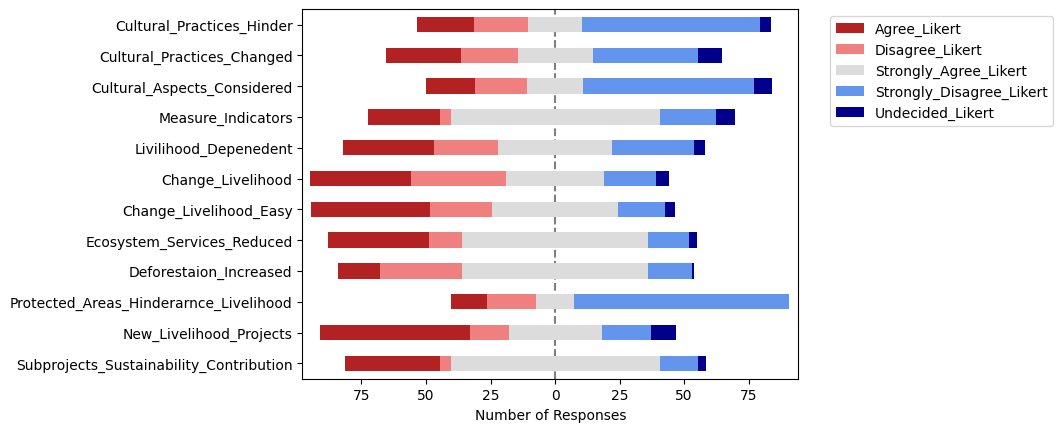

In [83]:
plot_likert.plot_counts(all_counts1, plot_likert.scales.agree);

In [65]:
#plot_likert.plot_likert(all_counts, plot_likert.scales.agree, plot_percentage=True, bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral)

In [40]:
CPH = df3["Cultural_Practices_Hinder"].value_counts()

In [41]:
CPH

Cultural_Practices_Hinder
Strongly_Disagree_Likert    69
Agree_Likert                22
Strongly_Agree_Likert       21
Disagree_Likert             21
Undecided_Likert             4
Name: count, dtype: int64

In [44]:
print(df3['Cultural_Practices_Hinder'].unique())

['Agree_Likert' 'Strongly_Agree_Likert' 'Strongly_Disagree_Likert'
 'Disagree_Likert' nan 'Undecided_Likert']


In [45]:
scales_agree = ['Strongly disagree', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Strongly agree']

# Clean up responses
df4 = df3.copy()
df4['Cultural_Practices_Hinder'] = df4['Cultural_Practices_Hinder'].str.strip()
df5 = df4.dropna(subset=['Cultural_Practices_Hinder'])
#df4 = df4.map(lambda x: x.strip() if isinstance(x, str) else x)
#df4['Cultural_Practices_Hinder'] = df4['Cultural_Practices_Hinder'].fillna('Neither agree nor disagree')

# Check for unexpected values
unexpected_values = set(df5['Cultural_Practices_Hinder']) - set(scales_agree)
if unexpected_values:
    print(f"Unexpected values found: {unexpected_values}")


Unexpected values found: {'Strongly_Disagree_Likert', 'Disagree_Likert', 'Strongly_Agree_Likert', 'Undecided_Likert', 'Agree_Likert'}


In [46]:
# Example mapping of unexpected to expected values
replacements = {
    'Agree_Likert': 'Agree',  # Replace with correct value
    'Strongly_Agree_Likert': 'Strongly agree', 
    'Undecided_Likert': 'Neither agree nor disagree', 
    'Disagree_Likert': 'Disagree', 
    'Strongly_Disagree_Likert': 'Strongly disagree' 
 }

df5['Cultural_Practices_Hinder'] = df5['Cultural_Practices_Hinder'].replace(replacements)

# Validate again
unexpected_values = set(df5['Cultural_Practices_Hinder']) - set(scales_agree)
if unexpected_values:
    print(f"Still unexpected values: {unexpected_values}")


C:\Users\nazin\AppData\Local\Temp\ipykernel_12220\3728048527.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Cultural_Practices_Hinder'] = df5['Cultural_Practices_Hinder'].replace(replacements)


In [47]:
print(df5['Cultural_Practices_Hinder'].unique())

['Agree' 'Strongly agree' 'Strongly disagree' 'Disagree'
 'Neither agree nor disagree']


In [53]:
#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,3))
#plot_likert.plot_likert(df5, plot_likert.scales.agree, 
                        #plot_percentage=True,  # show absolute values
                        #ax=ax1,  # show on the left-side subplot
                        #legend=0,  # hide the legend for the subplot, we'll show a single figure legend instead                        
                       #);
#plot_likert.plot_likert(df5, plot_likert.scales.agree, 
                       # plot_percentage=True,  # show percentage values
                        #ax=ax2,  # show on the right-side subplot
                        #legend=0,  # hide the legend for the subplot, we'll show a single figure legend instead
                        #width=0.15  # make the bars slimmer
                       #);

# display a single legend for the whole figure
#handles, labels = ax2.get_legend_handles_labels()
#fig.legend(handles, labels, bbox_to_anchor=(1.08, .9))
#plt.show()

C:\Users\nazin\AppData\Local\anaconda3\envs\NLTK_Py_3_12\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
C:\Users\nazin\AppData\Local\anaconda3\envs\NLTK_Py_3_12\Lib\site-packages\plot_likert\plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


<Axes: xlabel='Percentage of Responses'>

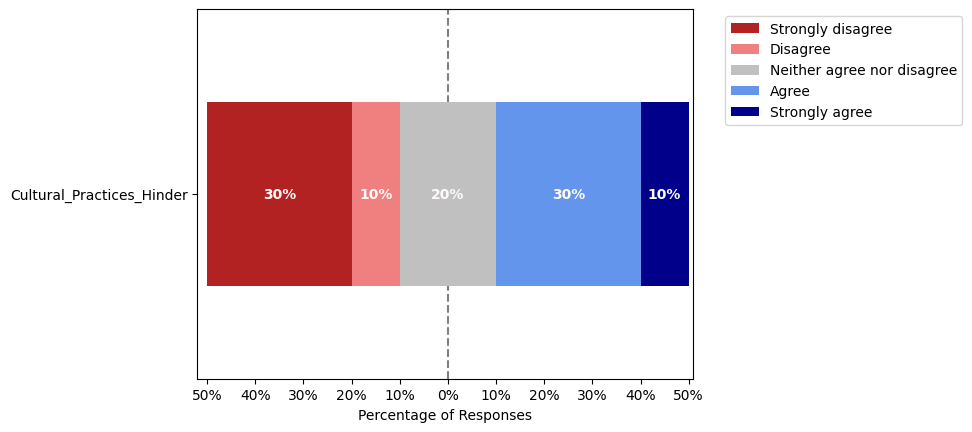

In [77]:
#CPH1 = pd.DataFrame(df5)
#CPH2 = CPH1.copy()
#CPH2.iloc[0,0] = np.nan
#CPH2["Cultural_Practices_Hinder"] = CPH2["Cultural_Practices_Hinder"].str.strip().str.lower()
#valid_responses = ['strongly disagree', 'disagree', 'undecide', 'agree', 'strongly agree']
#CPH2 = CPH2[CPH2["Cultural_Practices_Hinder"].isin(valid_responses)]
rng = np.random.default_rng(seed=42)
df5 = pd.DataFrame(rng.choice(plot_likert.scales.agree, (10,1)), columns=["Cultural_Practices_Hinder"])
plot_likert.plot_likert(df5, plot_likert.scales.agree, plot_percentage=True, bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral)

C:\Users\nazin\AppData\Local\anaconda3\envs\NLTK_Py_3_12\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
C:\Users\nazin\AppData\Local\anaconda3\envs\NLTK_Py_3_12\Lib\site-packages\plot_likert\plot_likert.py:269: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  counts = counts.fillna(0)
C:\Users\nazin\AppData\Local\anaconda3\envs\NLTK_Py_3_12\Lib\site-packages\plot_likert\plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_que

ValueError: arange: cannot compute length

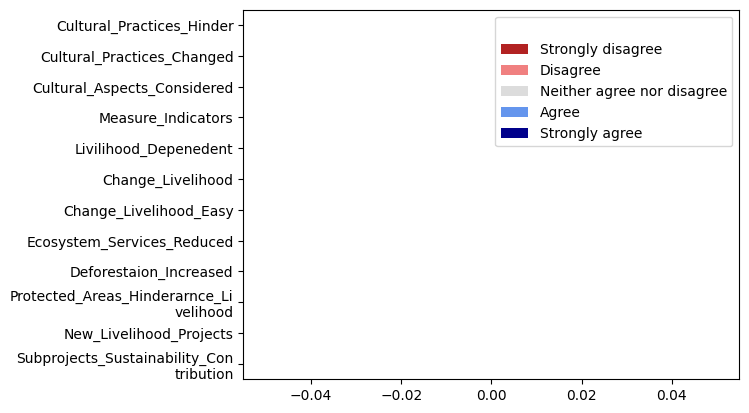

In [253]:
CPH1 = pd.DataFrame(df3)
CPH1["Cultural_Practices_Hinder"] = CPH1["Cultural_Practices_Hinder"].str.strip().str.lower()
valid_responses = ['strongly disagree', 'disagree', 'undecide', 'agree', 'strongly agree']
CPH1 = CPH1[CPH1["Cultural_Practices_Hinder"].isin(valid_responses)]
plot_likert.plot_likert(CPH1, plot_likert.scales.agree, plot_percentage=True)

In [266]:
CPHR=df1["Cultural_Practices_Hinder_Reason"].tolist()

In [267]:
CPHR

['It has never happed before in his life time',
 'There is need to harvest tree when they have fully grown the same applies to biodiversity',
 'There are no customary practices that hinder sustainable management',
 'There are rotations made on the land when cultivation to ensure fetility of soil',
 'There is nothing',
 'There is nothing',
 'Therevis nothing',
 'You are allowed to cultivate an area for 3 years before shifting yo another area',
 'There is nothing',
 'There is nothing',
 'There are no cultural history within the community e cept the from the governmnet',
 'There rules from the chiefs who ensurex the harvesting period are followed as well as the periond vor burining the bush',
 'There is a norms of the period when the bush has to be be burt sothe the bush is not completely burnt',
 'There are  cultural norms',
 'There is nothing',
 'There is nothing',
 'Threr is nothing',
 'There is nothing',
 'There are cusyomsry practices that protect thr environment like Zawa protect th

In [268]:
len(df1["Cultural_Practices_Hinder_Reason"])

150

In [269]:
len(set(df1["Cultural_Practices_Hinder_Reason"]))

78

In [270]:
FreqDist(CPHR)

FreqDist({'There is nothing': 49, nan: 18, 'Tgere is nothing': 3, 'Therevis nothing': 2, 'Threr is nothing': 2, 'Tehre is nothing': 2, 'Thee is nothing': 2, 'There 8s nothing': 2, 'It has never happed before in his life time': 1, 'There is need to harvest tree when they have fully grown the same applies to biodiversity': 1, ...})

In [207]:
stop_words = stopwords.words ("English")

In [275]:
df1 ["Cultural_Practices_Hinder_Reason"][1:150]
lemmatizer=WordNetLemmatizer()
for index, row in df1.iterrows():
    filter_sentence = []
    sentence = row ["Cultural_Practices_Hinder_Reason"]
    sentence = re.sub(r'[^\w\s]','',sentence)
    words = nltk.word_tokenize(sentence)
    words = [w for w in words if not w in stop_words]
    for word in words:
        filter_sentence.append(lemmatizer.lemmatize(word))
    print(filter_sentence)
    #df1.loc[index, "Cultural_Practices_Hinder_Reason"] = filter_sentence    

['It', 'never', 'happed', 'life', 'time']
['There', 'need', 'harvest', 'tree', 'fully', 'grown', 'applies', 'biodiversity']
['There', 'customary', 'practice', 'hinder', 'sustainable', 'management']
['There', 'rotation', 'made', 'land', 'cultivation', 'ensure', 'fetility', 'soil']
['There', 'nothing']
['There', 'nothing']
['Therevis', 'nothing']
['You', 'allowed', 'cultivate', 'area', '3', 'year', 'shifting', 'yo', 'another', 'area']
['There', 'nothing']
['There', 'nothing']
['There', 'cultural', 'history', 'within', 'community', 'e', 'cept', 'governmnet']
['There', 'rule', 'chief', 'ensurex', 'harvesting', 'period', 'followed', 'well', 'periond', 'vor', 'burining', 'bush']
['There', 'norm', 'period', 'bush', 'burt', 'sothe', 'bush', 'completely', 'burnt']
['There', 'cultural', 'norm']
['There', 'nothing']
['There', 'nothing']
['Threr', 'nothing']
['There', 'nothing']
['There', 'cusyomsry', 'practice', 'protect', 'thr', 'environment', 'like', 'Zawa', 'protect', 'thr', 'biofiversiyy']
['

TypeError: expected string or bytes-like object, got 'float'